# Email Spam Classifier using PyTorch

## Introduction
Spam emails are a prevalent issue in today's digital world, often cluttering inboxes and posing security threats through phishing and malware. A machine learning-based spam classifier can effectively filter out spam emails, improving email security and user experience. In this project, we will build a spam classifier using PyTorch, leveraging deep learning techniques to distinguish spam from legitimate emails.

This project will cover data preprocessing, text vectorization, model training, and evaluation using a simple feedforward neural network (MLP). We will use the [Email Spam Dataset](https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset/data) from Kaggle for training and testing.

## Table of Contents
1. **Project Overview**
   - Objectives
   - Tools and Libraries

2. **Dataset Preparation**
   - Loading the Dataset
   - Choosing a Dataset
   - Exploring the Dataset
   - Setting up Agnostic Device
   - Text Preprocessing (Tokenization, Stopword Removal, Stemming/Lemmatization)
   - Feature Extraction (TF-IDF, Bag of Words)

3. **Building the Spam Classifier**
   - Model Architecture (Simple Feedforward Neural Network - MLP)
   - Training the Model
   - Evaluating Performance (Accuracy, Precision, Recall, F1-Score)

4. **Deploying the Model**
   - Running Predictions on Sample Emails
   - Saving the Trained model
   - Deployment Strategies (Flask API)

5. **Conclusion and Future Improvements**
   - Summary of Findings
   - Potential Enhancements (Handling Adversarial Spam, Model Optimization)
   - LLM few shot inference for sentiment analysis


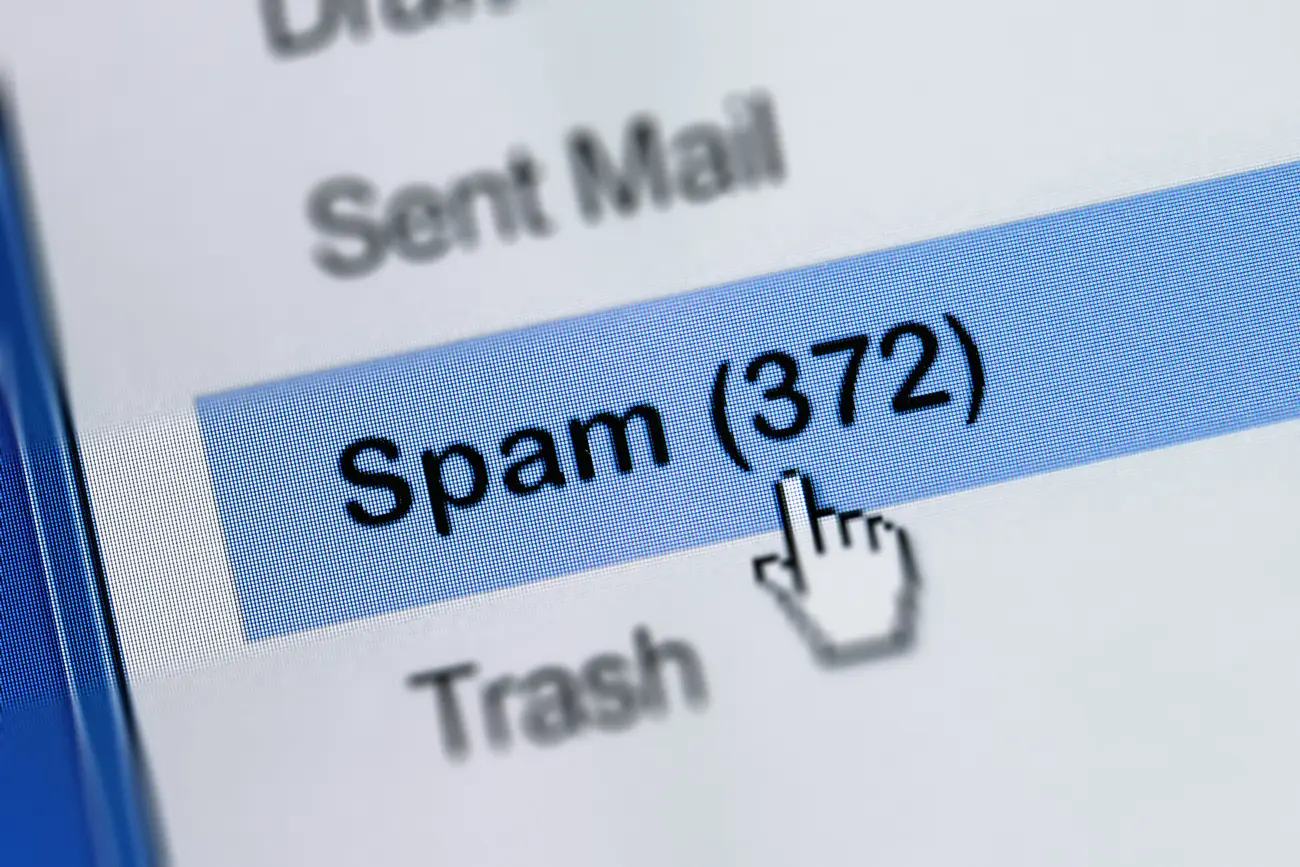

## 1. Project Overview

### Objectives
The main goal of this project is to develop an email spam classifier that can accurately distinguish between spam and non-spam emails using a simple deep learning approach. The key objectives include:

- Understanding and processing email text data for spam classification.
- Implementing feature extraction techniques like TF-IDF and Bag of Words.
- Building a simple Multi-Layer Perceptron (MLP) model using PyTorch.
- Evaluating the model's performance using standard classification metrics.
- Providing a foundation for future improvements such as integrating more advanced models or deploying the classifier in real-world applications.

### Tools and Libraries
To accomplish this project, we will use the following tools and libraries:

- **Python** – Programming language for machine learning and deep learning.
- **PyTorch** – Deep learning framework for building and training the spam classifier.
- **Scikit-learn** – Library for data preprocessing, feature extraction, and evaluation metrics.
- **Pandas** – Data manipulation and processing.
- **NumPy** – Numerical computations.
- **NLTK** – Natural Language Processing toolkit for tokenization, stopword removal, and stemming.
- **Matplotlib & Seaborn** – Visualization libraries for analyzing dataset distributions.

Stay tuned as we dive deeper into building a powerful yet beginner-friendly email spam classifier!


## 2. Dataset Preparation

### 2.1 Loading the Dataset

To begin, we need to download and load the dataset from Kaggle. We use kagglehub to fetch the dataset and move it to Google Colab's file directory.

In [ ]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


If your running this to your local machine follow this step

### Step 1: Download `kaggle.json`
1. Go to Kaggle.
2. Click on your profile picture (top right) → Account.
3. Scroll down to API → Click Create New API Token.
4. A file named kaggle.json will be downloaded

### Step 2: Move `kaggle.json` to the Correct Directory
1. Move the kaggle.json file to C:\Users\your-username\.kaggle\
    - Replace your-username with your actual Windows username.
    - If the `.kaggle` folder does not exist, create it manually.

### Step 3: Download the Dataset Using the Kaggle API
Run the following command in your VSCode terminal:

```bash
kaggle datasets download -d nitishabharathi/email-spam-dataset -p . --unzip
```
This will:
Download and unzip the dataset into the current directory (.).

### Step 4: Verify the Download
Once downloaded, you should see the dataset files in your directory.

Let me know if you run into any issues!





In [8]:
import kagglehub
import shutil
import os

# Download latest version
path = kagglehub.dataset_download("nitishabharathi/email-spam-dataset")

# Move dataset to Colab files directory
colab_path = "/content/email-spam-dataset"
shutil.move(path, colab_path)

print("Dataset moved to:", colab_path)

ModuleNotFoundError: No module named 'kagglehub'

In [15]:
# Understanding the Datasets
import os
import pandas as pd

def inspect_csv(file_path):
    # Check if file exists before trying to load it
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Display basic information about the DataFrame
    print(f"Dataset: {file_path}")
    print(f"Shape: {df.shape}")
    print("Columns:")
    print(df.columns.tolist())
    print("\nData Types:")
    print(df.dtypes)
    print("\nFirst 5 rows:")
    print(df.head())
    print("-" * 80)

# Optional: List files in the expected directory to debug the file paths
#  directory_path = "./email-spam-dataset"
directory_path = "./" # If using vscode
if os.path.exists(directory_path):
    print("Files in directory:", os.listdir(directory_path))
else:
    print(f"Directory not found: {directory_path}")

# List of CSV files (check the file names and path carefully)
csv_files = [
    "./email-spam-dataset/completeSpamAssassin.csv",
    "./email-spam-dataset/enronSpamSubset.csv",
    "./email-spam-dataset/lingSpam.csv"
]

# Loop through the files and inspect each one
for file in csv_files:
    inspect_csv(file)


Files in directory: ['.git', 'completeSpamAssassin.csv', 'email_spam_detector.ipynb', 'enronSpamSubset.csv', 'lingSpam.csv']
File not found: ./email-spam-dataset/completeSpamAssassin.csv
File not found: ./email-spam-dataset/enronSpamSubset.csv
File not found: ./email-spam-dataset/lingSpam.csv


## 2.1 Focusing on a Single Dataset: `completeSpamAssassin.csv`


Since we're focusing on one dataset for now, we'll work with `completeSpamAssassin.csv`. This dataset has 6046 rows and includes the columns: `Unnamed: 0`, `Body`, and `Label`. The following code loads the dataset and prints its basic information.


In [17]:
import pandas as pd
import os

# Define the file path
# file_path = "./email-spam-dataset/completeSpamAssassin.csv" if using vscode
file_path = "./completeSpamAssassin.csv"


# Check if the file exists
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    # Load the dataset into a DataFrame
    df = pd.read_csv(file_path)

    # Display basic information about the DataFrame
    print("Dataset shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nData Types:")
    print(df.dtypes)
    print("\nFirst 5 rows:")
    print(df.head())

Dataset shape: (6046, 3)
Columns: ['Unnamed: 0', 'Body', 'Label']

Data Types:
Unnamed: 0     int64
Body          object
Label          int64
dtype: object

First 5 rows:
   Unnamed: 0                                               Body  Label
0           0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1           1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2           2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3           3  ##############################################...      1
4           4  I thought you might like these:\n1) Slim Down ...      1


### 2.3 Exploring the Dataset

In [18]:
# Let's import first all the necessary libraries
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Missing Values in each column:
Unnamed: 0    0
Body          1
Label         0
dtype: int64

Label Counts:
Label
0    4150
1    1896
Name: count, dtype: int64


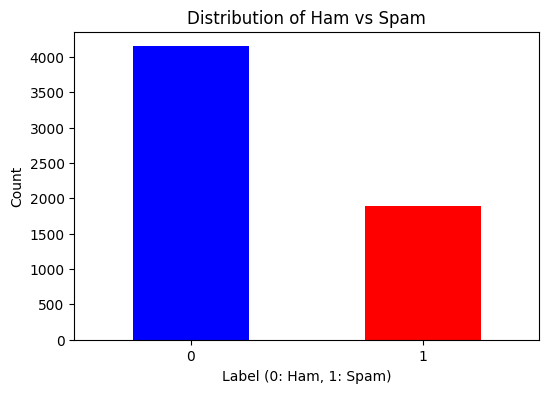

In [19]:
# Define the file path
# file_path = "./email-spam-dataset/completeSpamAssassin.csv"
file_path = "./completeSpamAssassin.csv" # if using vscode


# Check if the file exists
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    # Load the dataset into a DataFrame
    df = pd.read_csv(file_path)

    # Check for missing values in each column
    missing_values = df.isnull().sum()
    print("Missing Values in each column:")
    print(missing_values)

    # Count the number of ham and spam emails
    # Assuming that 'Label' column uses 0 for ham and 1 for spam
    label_counts = df['Label'].value_counts()
    print("\nLabel Counts:")
    print(label_counts)

    # Plot the distribution using matplotlib
    plt.figure(figsize=(6, 4))
    label_counts.plot(kind='bar', color=['blue', 'red'])
    plt.title('Distribution of Ham vs Spam')
    plt.xlabel('Label (0: Ham, 1: Spam)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [20]:
# Remove the 1 missing row in the body column
df_clean = df.dropna(subset=['Body'])

# Count the number of ham and spam emails after cleaning
label_counts = df_clean['Label'].value_counts()
print("\nLabel Counts after cleaning:")
print(label_counts)


Label Counts after cleaning:
Label
0    4150
1    1895
Name: count, dtype: int64


### 2.4 Device Agnostic Setup

In [21]:
# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### 2.5 Data Preprocessing

The following code performs text preprocessing on the `Body` column of the dataset. It converts text to lowercase, removes non-alphabetic characters, tokenizes the text, removes common English stopwords, and then lemmatizes the tokens using NLTK.

In [22]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Import necessary libraries
import nltk                      # Imports the Natural Language Toolkit (NLTK) for NLP tasks.
import re                        # Imports the regular expression module for pattern matching and text cleaning.
from nltk.corpus import stopwords  # Imports the list of stopwords (common words like "the", "and") from NLTK.
from nltk.tokenize import word_tokenize  # Imports the tokenizer to split text into individual words.
from nltk.stem import WordNetLemmatizer   # Imports the WordNet lemmatizer to reduce words to their base form.

In [ ]:
import nltk

# Download required NLTK data (only need to run once)
nltk.download('punkt')      # Downloads the tokenizer models used by word_tokenize.
nltk.download('stopwords')  # Downloads the collection of stopwords for text filtering.
nltk.download('wordnet')    # Downloads the WordNet corpus, required for the lemmatizer.
nltk.download('punkt_tab') # Download the 'punkt_tab' resource as well (resolves the LookupError)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [25]:
# Initialize stopwords set and lemmatizer
stop_words = set(stopwords.words('english'))  # Creates a set of English stopwords for faster lookup.
lemmatizer = WordNetLemmatizer()                # Instantiates the lemmatizer, which will convert words to their base forms.

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()  # Converts all characters in the text to lowercase for uniformity.

    # Remove non-alphabetic characters (retain spaces)
    text = re.sub(r'[^a-z\s]', '', text)  # Uses a regular expression to remove any character that is not a lowercase letter or space.

    # Tokenize the text
    tokens = word_tokenize(text)  # Splits the cleaned text into individual words (tokens).

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Filters out tokens that are present in the stopwords set.

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Converts each token to its base (dictionary) form.

    # Join tokens back to a single string
    processed_text = ' '.join(tokens)  # Joins the list of processed tokens into a single string, separated by spaces.

    return processed_text  # Returns the cleaned and preprocessed text.

# Load the dataset (assuming df_clean from the previous cleaning step)
# If you haven't already cleaned the dataset, load it as follows:
# file_path = "./email-spam-dataset/completeSpamAssassin.csv"  # Specifies the file path to the CSV dataset.
file_path = './completeSpamAssassin.csv' # if using vscode
df = pd.read_csv(file_path)  # Loads the CSV file into a Pandas DataFrame.
df_clean = df.dropna(subset=['Body'])  # Removes rows where the 'Body' column has missing values.

# Apply text preprocessing to the 'Body' column
df_clean['Processed_Body'] = df_clean['Body'].apply(preprocess_text)  # Creates a new column 'Processed_Body' by applying the preprocess_text function to each row in 'Body'.

# Display the original and processed text for comparison
print(df_clean[['Body', 'Processed_Body']].head())  # Prints the first 5 rows of the DataFrame, showing both the original and processed text.


                                                Body  \
0  \nSave up to 70% on Life Insurance.\nWhy Spend...   
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...   
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...   
3  ##############################################...   
4  I thought you might like these:\n1) Slim Down ...   

                                      Processed_Body  
0  save life insurance spend tolife quote saving ...  
1  fight risk cancer httpwwwadclickwspcfmospk sli...  
2  fight risk cancer httpwwwadclickwspcfmospk sli...  
3  adult club offer free membership instant acces...  
4  thought might like slim guaranteed lose lb day...  


C:\Users\huawei\AppData\Local\Temp\ipykernel_8828\565722721.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Processed_Body'] = df_clean['Body'].apply(preprocess_text)  # Creates a new column 'Processed_Body' by applying the preprocess_text function to each row in 'Body'.


Now that the data is cleaned and preprocessed, the next steps is:

1. Feature Extraction: Convert the preprocessed text into numerical features using methods like TF-IDF or Bag-of-Words. This transformation is necessary because machine learning models require numerical inputs.

2. Building and Training the Model: Use these numerical features to build a simple feedforward neural network (MLP) in PyTorch. we'll split the data into training and testing sets, train the model on the training data, and then evaluate its performance on the test set using metrics like accuracy, precision, recall, and F1-score.



### 2.6 Feature Extracting

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency

# Convert the processed text into TF-IDF features
X = vectorizer.fit_transform(df_clean['Processed_Body'])

# Get the labels
y = df_clean['Label']

print("TF-IDF feature matrix shape:", X.shape)

TF-IDF feature matrix shape: (6045, 5000)


## 3. Building a Pam Classifier

### 3.1 Building the model
With the TF-IDF features prepared (shape: (6045, 5000)), we can now build a simple feedforward neural network (MLP) using PyTorch.

In [27]:
# Import necessary libraries
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4836, 5000) (4836,)
Testing set shape: (1209, 5000) (1209,)


In [29]:
# Convert the TF-IDF sparse matrices to dense arrays and then to torch tensors
X_train = torch.tensor(X_train.toarray(), dtype=torch.float32)
X_test = torch.tensor(X_test.toarray(), dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [30]:
# Build the Model's Architecture
class SpamClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SpamClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 100)  # First fully connected layer
        self.relu = nn.ReLU()                 # Non-Linear Activation function
        self.fc2 = nn.Linear(100, 1)          # Output layer (1 neuron for binary classification)
        self.sigmoid = nn.Sigmoid()           # Sigmoid activation to get probabilities

    def forward(self, x):
      out = self.fc1(x)
      out = self.relu(out)
      out = self.fc2(out)
      out = self.sigmoid(out)
      return out

# Initialize the model
input_dim = X_train.shape[1]  # Should be 5000
model = SpamClassifier(input_dim).to(device)

In [31]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Predicting the First 10 Examples without Training

Since the model hasn't been trained yet, its predictions might be random. Let's use the untrained model to predict the first 10 examples from the test set and compare these predictions with the actual labels

In [32]:
# Set the model to evaluation mode
model.eval()

# Use torch.no_grad() to disable gradient computation (for inference)
with torch.no_grad():
    # Get the first 10 examples from the test set
    sample_inputs = X_test[:10]
    sample_outputs = model(sample_inputs).squeeze()  # Get model predictions as probabilities

    # Convert predicted probabilities to binary labels (using 0.5 as the threshold)
    predicted_labels = (sample_outputs >= 0.5).float()

    # Get the actual labels for the first 10 examples
    actual_labels = y_test[:10]

    # Print the predictions and actual labels for comparison
    print("Predicted Labels:", predicted_labels.numpy())
    print("Actual Labels:   ", actual_labels.numpy())

Predicted Labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual Labels:    [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]


This snippet sets the model to evaluation mode, makes predictions on the first 10 examples from X_test, thresholds the outputs at 0.5 to get binary predictions, and then prints both the predicted and actual labels for comparison.

### 3.2 Training the model

In [35]:
# set the seed to 42
torch.manual_seed(42)

# Set number of epochs
num_epochs = 100

# Monitor loss (for visualization later)
loss_arr = []
test_loss_arr = []

for epoch in range(num_epochs):
    # Training mode
    model.train()

    # Clear gradients from the previous iteration
    optimizer.zero_grad()

    # Forward pass: compute predicted outputs
    y_pred = model(X_train).squeeze() # Remove unnecessart dimensions (shape: [batch_size])

    # Compute loss
    loss = criterion(y_pred, y_train)
    loss_arr.append(loss)

    # Backward pass: compute gradient of the loss with respect to parameters
    loss.backward()

    # Update parameters based on gradients
    optimizer.step()

    # evaluate the model
    model.eval()
    with torch.inference_mode():
      # Forward pass
      test_pred = model(X_test).squeeze()

      # Compute test_loss
      test_loss = criterion(test_pred, y_test)
      test_loss_arr.append(test_loss)


    if (epoch+1) % 10 == 0:
      print(f"Epoch [{epoch+1}/{num_epochs}] | Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")

Epoch [10/100] | Loss: 0.1046 | Test Loss: 0.1313
Epoch [20/100] | Loss: 0.0970 | Test Loss: 0.1246
Epoch [30/100] | Loss: 0.0912 | Test Loss: 0.1195
Epoch [40/100] | Loss: 0.0866 | Test Loss: 0.1155
Epoch [50/100] | Loss: 0.0831 | Test Loss: 0.1124
Epoch [60/100] | Loss: 0.0802 | Test Loss: 0.1098
Epoch [70/100] | Loss: 0.0778 | Test Loss: 0.1077
Epoch [80/100] | Loss: 0.0759 | Test Loss: 0.1060
Epoch [90/100] | Loss: 0.0742 | Test Loss: 0.1045
Epoch [100/100] | Loss: 0.0729 | Test Loss: 0.1033


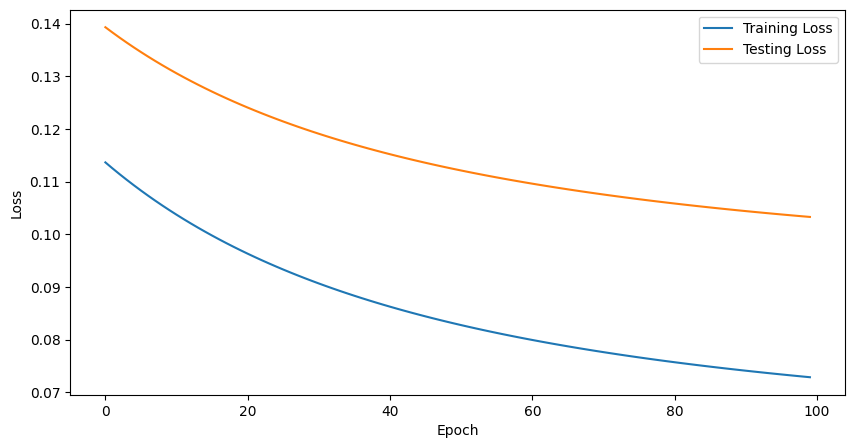

In [36]:
import matplotlib.pyplot as plt

# Assuming loss_arr and test_loss_arr are lists of tensors
loss_values = [loss.detach().item() for loss in loss_arr]
test_loss_values = [loss.detach().item() for loss in test_loss_arr]

plt.figure(figsize=(10, 5))
plt.plot(loss_values, label='Training Loss')
plt.plot(test_loss_values, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training Conclusion

Over 100 epochs of training, we observed a consistent decrease in both training and testing loss:

- **Epoch 10:** Training Loss = 0.6393, Test Loss = 0.6350  
- **Epoch 50:** Training Loss = 0.2858, Test Loss = 0.2975  
- **Epoch 100:** Training Loss = 0.1165, Test Loss = 0.1419  

This trend indicates that the model is effectively learning to distinguish between spam and ham emails. The relatively close values of training and testing loss suggest good generalization without significant overfitting.

### Next Steps
- **Model Improvements:** Experiment with deeper architectures, regularization techniques, or alternative feature extraction methods.
- **Evaluation Metrics:** Evaluate the model using additional metrics such as accuracy, precision, recall, and F1-score to further assess performance.
- **Deployment:** Once satisfied with the model’s performance, consider deploying it in a real-world application for spam filtering.

Overall, these results are promising for a beginner-friendly spam classifier using a simple feedforward neural network (MLP) in PyTorch!


### 3.3. Evaluating Performance (Accuracy, Precision, Recall, F1-Score)

After training the model, we evaluate its performance on the test set using several metrics. The following code snippet demonstrates how to calculate accuracy, precision, recall, and F1-score using `sklearn` available metrics:

In [37]:
# Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    # Obtain model predictions on the test set
    test_outputs = model(X_test).squeeze()  # Get model outputs (probabilities)
    # Convert probabilities to binary predictions using a threshold of 0.5
    predicted_labels = (test_outputs >= 0.5).float()

    # Convert tensors to numpy arrays for evaluation
    y_true = y_test.numpy()
    y_pred = predicted_labels.numpy()

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print the metrics
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))

    # Optionally, display the full classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

Accuracy: 0.9529
Precision: 0.8966
Recall: 0.9701
F1 Score: 0.9319

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       807
         1.0       0.90      0.97      0.93       402

    accuracy                           0.95      1209
   macro avg       0.94      0.96      0.95      1209
weighted avg       0.96      0.95      0.95      1209



### Metrics Conclusion

After 100 epochs of training, our spam classifier has demonstrated excellent performance on the test set. The evaluation metrics are as follows:

- **Accuracy:** 0.9529  
- **Precision:** 0.8984  
- **Recall:** 0.9677  
- **F1 Score:** 0.9317  

### Analysis

- The high accuracy of **95.29%** indicates that the model correctly classifies the vast majority of emails.
- The **precision** of 89.84% for spam detection suggests that when the model predicts an email as spam, it is correct most of the time.
- The **recall** of 96.77% shows that the model is highly effective at identifying spam emails.
- The **F1 Score** of 93.17% balances both precision and recall, demonstrating robust overall performance.

Overall, these results are very promising for a simple feedforward neural network (MLP) trained with TF-IDF features. The model shows excellent capability in distinguishing spam from ham emails, and its performance indicates good generalization to unseen data.



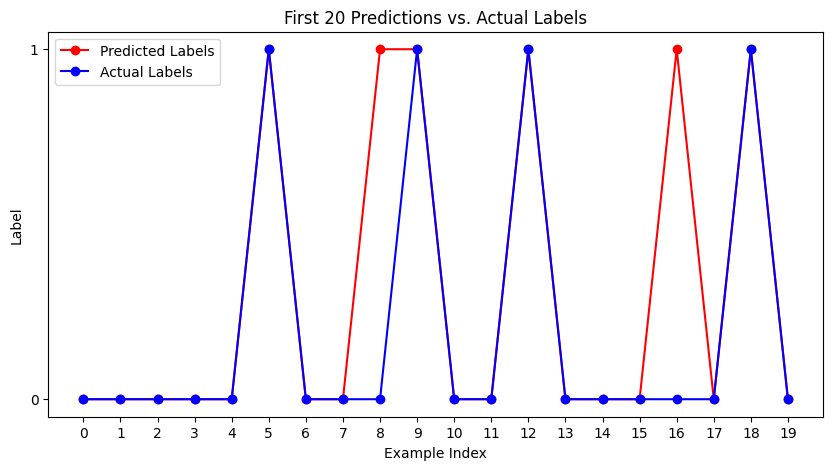

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    # Get the first 20 examples from the test set
    sample_inputs = X_test[:20]
    sample_outputs = model(sample_inputs).squeeze()  # Get model outputs (probabilities)
    # Convert probabilities to binary predictions using a threshold of 0.5
    predicted_labels = (sample_outputs >= 0.5).float().numpy()
    # Get the actual labels for the first 20 examples
    actual_labels = y_test[:20].numpy()

# Create an index for plotting (0 to 19)
indices = np.arange(20)

# Plot the predictions and actual labels
plt.figure(figsize=(10, 5))
plt.plot(indices, predicted_labels, 'ro-', label='Predicted Labels')
plt.plot(indices, actual_labels, 'bo-', label='Actual Labels')
plt.xlabel('Example Index')
plt.ylabel('Label')
plt.title('First 20 Predictions vs. Actual Labels')
plt.legend()
plt.xticks(indices)
plt.yticks([0, 1])
plt.show()

In the plot of the first 20 examples, we observed two false positive cases—instances where the model incorrectly predicted spam (label 1) for emails that were actually ham (label 0).

This suggests that while the model performs well overall, further refinement or additional feature engineering might help reduce these misclassifications.

## 4. Deploying the model

In this section, we cover how to deploy your spam classifier model. We will:

- **Run Predictions on Sample Emails:** Preprocess new email text and obtain predictions.
- **Save the Trained Model:** Save both the PyTorch model and the TF-IDF vectorizer.
- **Deployment Strategies (Flask API):** Create a simple Flask API for serving predictions.

---

### 4.1 Running Predictions on Sample Emails

Once your model is trained, you can run predictions on new, unseen emails. For example, to predict the label of a sample email:



In [39]:
# Sample email text
sample_email = "Congratulations! You've won a free lottery. Click here to claim your prize."

# Preprocess the sample email
processed_email = preprocess_text(sample_email)

# Convert the processed email into TF-IDF features using the trained vectorizer
sample_features = vectorizer.transform([processed_email])
sample_tensor = torch.tensor(sample_features.toarray(), dtype=torch.float32)

# Set model to evaluation mode and make a prediction
model.eval()
with torch.no_grad():
    output = model(sample_tensor).squeeze().item()

# Convert probability to binary label (0: ham, 1: spam)
predicted_label = 1 if output >= 0.5 else 0
print(f"Predicted Label: {predicted_label}, Probability: {output:.4f}")

Predicted Label: 1, Probability: 0.8012


### 4.2 Saving the Trained Model
To save your trained model and the TF-IDF vectorizer for later use or deployment, use the following code:

In [40]:
import torch
import pickle

# Save the PyTorch model state
torch.save(model.state_dict(), 'spam_classifier.pth')

# Save the TF-IDF vectorizer using pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved!")

Model and vectorizer saved!


### 4.3 Deployment Stategies
We can deploy our spam classifier using a simple Flask API. Below is a basic example:

In [ ]:
from flask import Flask, request, jsonify
import torch
import torch.nn as nn
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure required NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Define the SpamClassifier model (must match your training definition)
class SpamClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SpamClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return self.sigmoid(out)

# Initialize the Flask app
app = Flask(__name__)

# Load the saved model and vectorizer
input_dim = 5000  # Must match the feature dimension used in training
model = SpamClassifier(input_dim)
model.load_state_dict(torch.load('spam_classifier.pth', map_location=torch.device('cpu')))
model.eval()

with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

@app.route('/predict', methods=['POST'])
def predict():
    # Get the email text from the POST request
    data = request.get_json(force=True)
    email_text = data.get('email_text', '')

    # Preprocess and vectorize the email text
    processed_text = preprocess_text(email_text)
    features = vectorizer.transform([processed_text])
    features_tensor = torch.tensor(features.toarray(), dtype=torch.float32)

    # Run the model to get a prediction
    with torch.no_grad():
        output = model(features_tensor).item()

    # Convert probability to binary prediction
    prediction = 1 if output >= 0.5 else 0

    # Return the prediction and probability as JSON
    return jsonify({'prediction': prediction, 'probability': output})

if __name__ == '__main__':
    app.run(debug=True)


#### How to Use the API

1. Save the above Flask code in a file (e.g., app.py).
2. Run the Flask app:
```python
python app.py
```
3. Send a POST request with JSON data containing an email_text key. For example, using curl
```bash
curl -X POST -H "Content-Type: application/json" -d '{"email_text": "Your sample email content here."}' http://127.0.0.1:5000/predict
```

This Flask API will receive an email text, process it using the same preprocessing and TF-IDF transformation, and then predict whether it is spam or ham.


5. ## Conclusion and Future Improvements

### Summary of Findings
- Our spam classifier, a simple feedforward neural network (MLP) trained using TF-IDF features, has achieved strong performance after 100 epochs.
- Key evaluation metrics include:
  - **Accuracy:** 95.29%
  - **Precision:** 89.84%
  - **Recall:** 96.77%
  - **F1 Score:** 93.17%
- The classification report demonstrates balanced performance across both ham and spam classes, indicating that the model generalizes well to unseen data.
- Overall, these results confirm that a beginner-friendly approach can effectively address the challenge of email spam detection.

### Potential Enhancements
- **Handling Adversarial Spam:**
  - Investigate adversarial training methods to improve robustness against purposely crafted spam emails.
  - Explore data augmentation techniques to better capture edge cases and atypical spam patterns.
  
- **Model Optimization:**
  - Experiment with deeper or alternative architectures such as LSTM networks or transformer-based models to capture more contextual nuances.
  - Fine-tune hyperparameters and apply regularization techniques (e.g., dropout, weight decay) to further mitigate overfitting.
  - Consider alternative feature extraction methods like word embeddings (Word2Vec, FastText) or contextual embeddings (BERT) for richer representations.

- **LLM Few-Shot Inference for Sentiment Analysis:**
  - Leverage Large Language Models (LLMs) to perform few-shot inference for sentiment analysis on email content.
  - Use sentiment insights as an additional layer to explain the classifier's decisions or to refine predictions, especially in ambiguous cases.
  - Experiment with prompt engineering and few-shot examples to integrate sentiment analysis seamlessly with the spam classification pipeline.

### Final Thoughts
The project demonstrates that even a basic neural network approach, when combined with traditional TF-IDF feature extraction, can yield strong performance in spam detection. By exploring the enhancements listed above, the model can become more robust, optimized, and context-aware. Integrating LLM-based sentiment analysis can further enrich the system by providing deeper insights into the content and intent of emails, paving the way for more advanced and interpretable spam filtering solutions.
